<a href="https://colab.research.google.com/github/Tejas892001/Machine-learning/blob/main/image%20classification%20using%20cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
#It classify the images among 10 different categories

In [6]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,) 
y_train[:5]

#Converted 2d of one element in each row to 1d array 

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [46]:
def plot_sample(X,y,index):
     plt.figure(figsize=(15,2))
     plt.imshow(X[index])
     plt.xlabel(classes[y[index]])


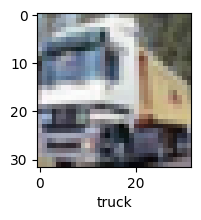

In [47]:
plot_sample(X_train,y_train,1)

In [13]:
te = np.unique(y_test[0:10000])
te

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
X_train = X_train/255 #Normalize to get good accuracy

In [22]:
#ANN model
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer = 'SGD',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 84s 53ms/step - loss: 1.8117 - accuracy: 0.3553
Epoch 2/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.6233 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.5395 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4819 - accuracy: 0.4796
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4329 - accuracy: 0.4968


In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 194.0285 - accuracy: 0.4446


[194.02850341796875, 0.444599986076355]

In [33]:
from keras.engine.training import optimizer
#CNN
model1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #This is dense layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    #In case of softmax sum of all output values will be equal to 1.
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

model1.fit(X_train,y_train,epochs=10)


Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4531 - accuracy: 0.4805
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0847 - accuracy: 0.6217
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9557 - accuracy: 0.6669
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8768 - accuracy: 0.6977
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8130 - accuracy: 0.7184
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7595 - accuracy: 0.7379
Epoch 7/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7133 - accuracy: 0.7533
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6730 - accuracy: 0.7652
Epoch 9/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6333 - accuracy: 0.7786
Epoch 10/10
1563/1563 [==============================] - 42s 27m

In [53]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 212.7501 - accuracy: 0.5213


[212.7501220703125, 0.5213000178337097]

In [54]:
y_test = y_test.reshape(-1,)

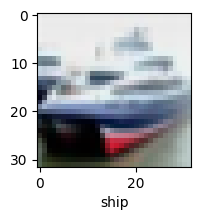

In [55]:
plot_sample(X_test,y_test,1)


In [56]:
y_pred = model1.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [58]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 5]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

print("Classificaton Report : \n",classification_report(y_test,y_classes))

Classificaton Report : 
               precision    recall  f1-score   support

           0       0.46      0.77      0.58      1000
           1       0.58      0.77      0.66      1000
           2       0.68      0.23      0.35      1000
           3       0.30      0.42      0.35      1000
           4       0.71      0.15      0.25      1000
           5       0.45      0.54      0.49      1000
           6       0.76      0.34      0.47      1000
           7       0.66      0.61      0.63      1000
           8       0.55      0.68      0.61      1000
           9       0.56      0.71      0.63      1000

    accuracy                           0.52     10000
   macro avg       0.57      0.52      0.50     10000
weighted avg       0.57      0.52      0.50     10000

